# SRT v2 - Ensayo

In [65]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

### Importamos Datos

In [2]:
df = pd.read_csv('cod_postal_series.csv', header=0,
                 names=['codigo','año','mes','total_cp'],
                 dtype={'codigo': str, 'año': str, 'mes': str, 'total_cp': str})

In [3]:
df.head()

,codigo,año,mes,total_cp
0,0,2022.0,1,208
1,0,2022.0,2,185
2,0,2022.0,3,289
3,0,2022.0,4,177
4,0,2022.0,5,177


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147066 entries, 0 to 147065
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   codigo    147066 non-null  object
 1   año       147066 non-null  object
 2   mes       147066 non-null  object
 3   total_cp  147066 non-null  object
dtypes: object(4)
memory usage: 4.5+ MB


#### Ajustamos tipo de datos

In [5]:
df['año'] = pd.to_numeric(df['año'], downcast='integer') #corregimos el formato de la columna 

In [6]:
df['mes'] = pd.to_numeric(df['mes']) #corregimos el formato de la columna 

In [7]:
df['total_cp'] = pd.to_numeric(df['total_cp']) #corregimos el formato de la columna 

In [8]:
df.dtypes

codigo      object
año          int16
mes          int64
total_cp     int64
dtype: object

In [9]:
df.head()

,codigo,año,mes,total_cp
0,0,2022,1,208
1,0,2022,2,185
2,0,2022,3,289
3,0,2022,4,177
4,0,2022,5,177


In [10]:
df.sort_values(['año','mes'], ascending=True)

,codigo,año,mes,total_cp
0,0,2022,1,208
33,01000000,2022,1,19
49,01001000,2022,1,172
65,01002000,2022,1,20
81,01003000,2022,1,7
...,...,...,...,...
146965,Z9050DJG,2023,4,1
146969,Z9303XAT,2023,4,1
146971,Z9310BDE,2023,4,1
146990,Z9400BJA,2023,4,1


#### Verificamos cantidad de registros por codigo

In [11]:
codigos = df.value_counts('codigo')

In [12]:
mayores_a_15 = codigos[codigos > 15]

In [13]:
df = df[df['codigo'].isin(mayores_a_15.index)]

In [14]:
df

,codigo,año,mes,total_cp
0,0,2022,1,208
1,0,2022,2,185
2,0,2022,3,289
3,0,2022,4,177
4,0,2022,5,177
...,...,...,...,...
146961,Z9050DJG,2022,12,2
146962,Z9050DJG,2023,1,2
146963,Z9050DJG,2023,2,6
146964,Z9050DJG,2023,3,1


### Transformacion

#### LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [ ]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [ ]:
X_encoded.shape

In [ ]:
pd.DataFrame(X_encoded)

#### Embeddings

In [ ]:
tamano_embedding = 10

In [ ]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [ ]:
matriz_embedding

In [ ]:
encoder.classes_

In [24]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [25]:
atributos_embeddings.shape

(25440, 10)

#### Verificacion embeddings

In [26]:
i = 0
encoder.classes_[i]

'0'

In [27]:
matriz_embedding[i]

array([0.27927103, 0.74680056, 0.88313751, 0.53328042, 0.13741989,
       0.32841121, 0.42626215, 0.86876411, 0.36410579, 0.6138577 ])

In [28]:
matriz_embedding.shape

(1590, 10)

#### Dataframe con datos de embeddings

In [29]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [30]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858
1,0.826541,0.659001,0.977955,0.576976,0.323701,0.277250,0.898178,0.245002,0.067290,0.871776
2,0.128071,0.837042,0.741181,0.531771,0.705557,0.100356,0.181408,0.206319,0.203828,0.739001
3,0.444723,0.269762,0.329519,0.459332,0.767068,0.798950,0.016633,0.640969,0.021447,0.832968
4,0.262707,0.220221,0.003103,0.169326,0.389509,0.930771,0.895399,0.554722,0.573339,0.029283
...,...,...,...,...,...,...,...,...,...,...
1585,0.054995,0.927812,0.075081,0.578382,0.464845,0.182750,0.148923,0.854997,0.648958,0.386907
1586,0.020611,0.830208,0.702329,0.049843,0.297721,0.908530,0.310786,0.590902,0.096509,0.722069
1587,0.844644,0.143982,0.681104,0.500096,0.894496,0.815890,0.477178,0.357682,0.815961,0.292478
1588,0.343951,0.108461,0.541435,0.216544,0.439447,0.397680,0.826574,0.192099,0.705607,0.720845


In [31]:
embedding_df['codigo'] = encoder.classes_

In [32]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
codigo,,,,,,,,,,
0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858
01000000,0.826541,0.659001,0.977955,0.576976,0.323701,0.277250,0.898178,0.245002,0.067290,0.871776
01001000,0.128071,0.837042,0.741181,0.531771,0.705557,0.100356,0.181408,0.206319,0.203828,0.739001
01002000,0.444723,0.269762,0.329519,0.459332,0.767068,0.798950,0.016633,0.640969,0.021447,0.832968
01003000,0.262707,0.220221,0.003103,0.169326,0.389509,0.930771,0.895399,0.554722,0.573339,0.029283
...,...,...,...,...,...,...,...,...,...,...
Y4604CJC,0.054995,0.927812,0.075081,0.578382,0.464845,0.182750,0.148923,0.854997,0.648958,0.386907
Y4610XAH,0.020611,0.830208,0.702329,0.049843,0.297721,0.908530,0.310786,0.590902,0.096509,0.722069
Y4612JYI,0.844644,0.143982,0.681104,0.500096,0.894496,0.815890,0.477178,0.357682,0.815961,0.292478


In [33]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
0,2022,1,208
0,2022,2,185
0,2022,3,289
0,2022,4,177
0,2022,5,177
...,...,...,...
Z9050DJG,2022,12,2
Z9050DJG,2023,1,2
Z9050DJG,2023,2,6


In [34]:
df.total_cp.max()

5314

#### Transformar la variable de salida

In [35]:
mmscaler = MinMaxScaler()

In [36]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [37]:
df.head()

,año,mes,total_cp
codigo,,,
0,2022,1,0.038961
0,2022,2,0.034632
0,2022,3,0.054207
0,2022,4,0.033126
0,2022,5,0.033126


#### Joins de Dataframes

In [38]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
codigo,,,,,,,,,,,,,
0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858,2022,1,0.038961
0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858,2022,2,0.034632
0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858,2022,3,0.054207
0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858,2022,4,0.033126
0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9050DJG,0.923739,0.239034,0.476454,0.791916,0.694339,0.554814,0.873949,0.933293,0.969839,0.272998,2022,12,0.000188
Z9050DJG,0.923739,0.239034,0.476454,0.791916,0.694339,0.554814,0.873949,0.933293,0.969839,0.272998,2023,1,0.000188
Z9050DJG,0.923739,0.239034,0.476454,0.791916,0.694339,0.554814,0.873949,0.933293,0.969839,0.272998,2023,2,0.000941


#### Datos de entrenamiento

In [39]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
0,0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858,2022,1,0.038961
1,0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858,2022,2,0.034632
2,0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858,2022,3,0.054207
3,0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858,2022,4,0.033126
4,0,0.279271,0.746801,0.883138,0.533280,0.137420,0.328411,0.426262,0.868764,0.364106,0.613858,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25435,Z9050DJG,0.923739,0.239034,0.476454,0.791916,0.694339,0.554814,0.873949,0.933293,0.969839,0.272998,2022,12,0.000188
25436,Z9050DJG,0.923739,0.239034,0.476454,0.791916,0.694339,0.554814,0.873949,0.933293,0.969839,0.272998,2023,1,0.000188
25437,Z9050DJG,0.923739,0.239034,0.476454,0.791916,0.694339,0.554814,0.873949,0.933293,0.969839,0.272998,2023,2,0.000941
25438,Z9050DJG,0.923739,0.239034,0.476454,0.791916,0.694339,0.554814,0.873949,0.933293,0.969839,0.272998,2023,3,0.000000


In [40]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [41]:
X_data.shape

(25440, 12)

In [42]:
y_data = df_final['total_cp'].to_numpy()

In [43]:
y_data

array([0.03896104, 0.03463203, 0.05420666, ..., 0.00094109, 0.        ,
       0.        ])

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [45]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Validacion

In [46]:
pred_train = modelo.predict(X_train)
pred_test = modelo.predict(X_test)

In [47]:
mse_train = mean_squared_error(y_train, pred_train)
mse_test  = mean_squared_error(y_test, pred_test)

In [48]:
mse_train, mse_test

(0.0002568975887941088, 0.00020020063027105143)

In [49]:
rmse_train = np.sqrt(mse_train)
rmse_test  = np.sqrt(mse_test)
print('RMSE:', round(rmse_train,4), round(rmse_test,4))

RMSE: 0.016 0.0141


In [66]:
score = r2_score(y_test, pred_test)
print(f'R2 score: {score:.5f}')

R2 score: 0.01013


### Prediccion

In [81]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [82]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [83]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [84]:
atributos_in = atributos_in.reshape(1, 12)

In [85]:
pred = modelo.predict(atributos_in)

In [86]:
pred = mmscaler.inverse_transform(pred.reshape(-1, 1))

In [87]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0][0],2)} incidentes")  

Prediccion para el código 5467000 Año 2023 Mes 6: 20.58 incidentes


### Verificacion grafica

In [88]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
18272,5467000,0.79503,0.259701,0.050559,0.654623,0.617793,0.537292,0.856707,0.907609,0.362002,0.262,2022,1,0.000188
18273,5467000,0.79503,0.259701,0.050559,0.654623,0.617793,0.537292,0.856707,0.907609,0.362002,0.262,2022,2,0.001129
18274,5467000,0.79503,0.259701,0.050559,0.654623,0.617793,0.537292,0.856707,0.907609,0.362002,0.262,2022,3,0.000188
18275,5467000,0.79503,0.259701,0.050559,0.654623,0.617793,0.537292,0.856707,0.907609,0.362002,0.262,2022,4,0.000941
18276,5467000,0.79503,0.259701,0.050559,0.654623,0.617793,0.537292,0.856707,0.907609,0.362002,0.262,2022,5,0.000376
18277,5467000,0.79503,0.259701,0.050559,0.654623,0.617793,0.537292,0.856707,0.907609,0.362002,0.262,2022,6,0.000753
18278,5467000,0.79503,0.259701,0.050559,0.654623,0.617793,0.537292,0.856707,0.907609,0.362002,0.262,2022,7,0.000565
18279,5467000,0.79503,0.259701,0.050559,0.654623,0.617793,0.537292,0.856707,0.907609,0.362002,0.262,2022,8,0.000376
18280,5467000,0.79503,0.259701,0.050559,0.654623,0.617793,0.537292,0.856707,0.907609,0.362002,0.262,2022,9,0.000565
18281,5467000,0.79503,0.259701,0.050559,0.654623,0.617793,0.537292,0.856707,0.907609,0.362002,0.262,2022,10,0.000188


In [89]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [90]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][11])+'-'+str(row[1][12])+'-01')
    totales.append(row[1][13])

In [91]:
fechas[0]

'2022-1-01'

In [92]:
totales = mmscaler.inverse_transform([totales])

In [93]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

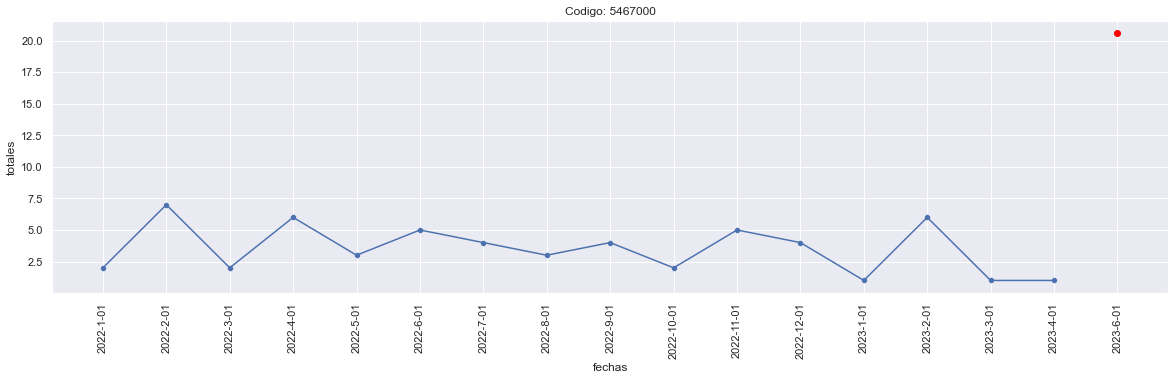

In [94]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred, color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()